In [1]:
'''
Ten: Le Hoang Duc
MSSV: 18110075
'''

'\nTen: Le Hoang Duc\nMSSV: 18110075\n'

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images ,train_labels), (test_images ,test_labels)=fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


In [5]:
# Split data
train_images, valid_images, train_labels, valid_labels = train_test_split(train_images, train_labels, 
                                                                          random_state=0,
                                                                          test_size=0.1)

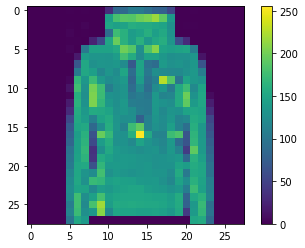

In [6]:
# Plot a sample
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [7]:
# Model
Inputs = tf.keras.layers.Input(shape=(28,28))
flatten = tf.keras.layers.Flatten()(Inputs)
dense1 = tf.keras.layers.Dense(700, activation="relu")(flatten)
dense2 = tf.keras.layers.Dense(600, activation="relu")(dense1)
dense3 = tf.keras.layers.Dense(500, activation="relu")(dense2)
dense4 = tf.keras.layers.Dense(400, activation="relu")(dense3)
dense5 = tf.keras.layers.Dense(300, activation="relu")(dense4)
Outputs = tf.keras.layers.Dense(10, activation="softmax")(dense5)

model = tf.keras.models.Model(inputs=Inputs, outputs=Outputs)

In [8]:
# model summary
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 700)               549500    
_________________________________________________________________
dense_1 (Dense)              (None, 600)               420600    
_________________________________________________________________
dense_2 (Dense)              (None, 500)               300500    
_________________________________________________________________
dense_3 (Dense)              (None, 400)               200400    
_________________________________________________________________
dense_4 (Dense)              (None, 300)               120300

## Cách tính số lượng tham số

Gọi $W^{[i]}$ là ma trận trọng số ở layer thứ $i'th$. Số lượng tham số được tính dựa trên số lượng kết nối giữa các hidden node của layer thứ $i'th$ và $i-1'th$ + số lượng bias của layer thứ $i'th$.

Như vậy: tổng số lượng tham số $\equiv$ $(784 \times 700 + 700)^{L[1]}$ + $(700 \times 600 + 600)^{L[2]}$ + $(600 \times 500 + 500)^{L[3]}$ + $(500 \times 400 + 400)^{L[4]}$ + $(400 \times 300 + 300)^{L[5]}$ + $(300 \times 10 + 10)^{L[6]}$ = $549500^{L[1]} + 420600^{L[2]} + 300500^{L[3]} + 200400^{L[4]} + 120300^{L[5]} + 3010^{L[6]}$ =  1594310

In [9]:
# compile model
model.compile(optimizer="Adam", 
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# train model
history=model.fit(x=train_images, y=train_labels,
                  epochs=20,
                  verbose=1,
                  validation_data=(valid_images,valid_labels))

Epoch 1/20
1688/1688 [==============================] - 12s 5ms/step - loss: 1.0790 - accuracy: 0.7886 - val_loss: 0.4984 - val_accuracy: 0.8213
Epoch 2/20
1688/1688 [==============================] - 8s 5ms/step - loss: 0.4558 - accuracy: 0.8378 - val_loss: 0.5180 - val_accuracy: 0.8137
Epoch 3/20
1688/1688 [==============================] - 8s 5ms/step - loss: 0.4250 - accuracy: 0.8489 - val_loss: 0.4248 - val_accuracy: 0.8527
Epoch 4/20
1688/1688 [==============================] - 8s 5ms/step - loss: 0.4041 - accuracy: 0.8567 - val_loss: 0.4152 - val_accuracy: 0.8512
Epoch 5/20
1688/1688 [==============================] - 8s 5ms/step - loss: 0.3822 - accuracy: 0.8659 - val_loss: 0.3597 - val_accuracy: 0.8757
Epoch 6/20
1688/1688 [==============================] - 8s 5ms/step - loss: 0.3649 - accuracy: 0.8710 - val_loss: 0.3711 - val_accuracy: 0.8705
Epoch 7/20
1688/1688 [==============================] - 9s 5ms/step - loss: 0.3531 - accuracy: 0.8745 - val_loss: 0.3697 - val_accuracy

In [10]:
# Predict on test
evaluation=model.evaluate(test_images, test_labels)
print("Accuracy on test {} - loss on test {}".format(evaluation[1], evaluation[0]))

313/313 [==============================] - 1s 3ms/step - loss: 0.3734 - accuracy: 0.8834
Accuracy on test 0.883400022983551 - loss on test 0.3734455704689026


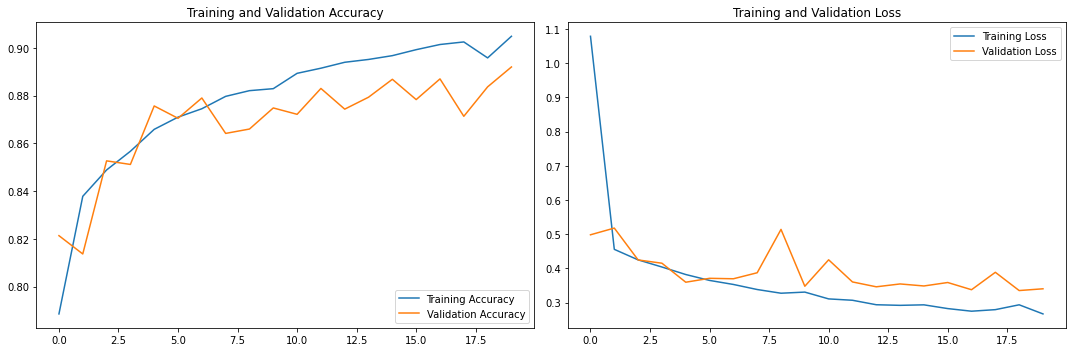

In [11]:
# Plot loss and accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.tight_layout()
plt.show()